#Introduction and Problem Definition

####***Background***

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

#####***Data Set***

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA.
In summary, in this project, I will be working with the first six steps in the ML pipeline.



## **Deciding the model to use**

A problem is said to be regression problem when the output of the  variable gives a real or continuous value. Since the Target in the Dataset bike-dataset hour  is '**cnt**', and it gives a real value. Then the models to be used is the linear regression.

## problem statement

The Bike -sharing dataset was obtained so that it can be used in ML model training to build a predictive model that answers the question: “what is the bike rental count hourly, what are the environmental conditions such as the environmental and seasonal settings"? given their data.



#Data Ingestion

Before working with the data I need to import all relevant Python modules. 
Also, I'll read in the dataset to be used "bike-dataset hour".

Then I'll check the first ten rows of the dataframe to have a glimpse of what is in the data

i'll further check which data is categorical or numerical.



In [ ]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.preprocessing  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bike-dataset hour.csv")
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,No,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,No,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,No,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,No,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,No,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,No,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,No,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,No,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,No,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,No,1,0.32,0.3485,0.76,0.0000,8,6,14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  object 
 9   weathersit  17379 non-null  int64  
 10  temp        15595 non-null  float64
 11  atemp       15595 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(2)
memory usage: 2.3+ MB


In [ ]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,15595.000000,15595.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,1.425283,0.496451,0.475300,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.639357,0.192580,0.171928,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
#we'll extract the categorical features  
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variabes \n'.format(len(categorical)))

print('They are: ', categorical)

There are 2 categorical variabes 

They are:  ['dteday', 'workingday']


In [ ]:
#we'll extract the numerical features 
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variabes \n'.format(len(numerical)))

print('They are: ', numerical)

There are 15 numerical variabes 

They are:  ['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


##**Findings from data ingestion**
From the above, it is observed that the bike-dataset hourhas a total 17379 rows and 17 columns. It has two Categorical data and 15 Numerical data.

# **Data Preparation**


It is assumed that 
- Missing values are in the ‘temp’ and ‘atemp’ columns.
- The peak usage hours are: 7-9AM and 4-7PM on working days, and 10am-4pm on non-working days.
- At night (10pm-4am) the bike rentals are low
- If the humidity or wind-speed is high, the number of rentals decreases.

In this case, based on the Exploratory data analysis 
that will be performed,I  want to do the following:

Fill the missing values in the temperature columns automatically with values that would most closely mirror the actual temperature.
- Create a new field that indicates whether it is a peak time or not
- Create a new field that indicates whether it is night time or not
- Remove all fields containing information about specific dates (‘yr’, ‘mnth’, ‘dteday’), ‘casual’ and ‘registered’ and any other variables 
- Suitable encoding of the data

### 3.1 Handling missing values
Based on the information above, missing values are in the temperature column. 
 
Replacing the missing values for the temperature column automatically with values that would most closely mirror the actual temperature.



In [ ]:
# median
df['temp'].fillna(value = df.temp.median(), inplace = True)

In [ ]:
 #median
df['atemp'].fillna(value = df.atemp.median(), inplace = True)

###Handling the hr column and creating a new column called peak_period and night_time. Here, I utilized **binning** as it was more convienient to use.

In [ ]:
df.loc[(df.workingday == 'Yes') & ((df.hr.between(7, 9)) | (df.hr.between(16, 19))), "peak_period"] = "Yes"


In [ ]:
df.loc[(df.workingday == 'No') & (df.hr.between(10, 16)), "peak_period"] = 'Yes'

In [ ]:
df.loc[(df.workingday == "Yes") & (df.peak_period !="Yes" ), "peak_period"] = 'No'

In [ ]:
df.loc[(df.workingday == "No") & (df.peak_period != "Yes"), "peak_period"] = 'No'

In [ ]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,peak_period
0,1,2011-01-01,1,0,1,0,0,6,No,1,0.24,0.2879,0.81,0.0000,3,13,16,No
1,2,2011-01-01,1,0,1,1,0,6,No,1,0.22,0.2727,0.80,0.0000,8,32,40,No
2,3,2011-01-01,1,0,1,2,0,6,No,1,0.22,0.2727,0.80,0.0000,5,27,32,No
3,4,2011-01-01,1,0,1,3,0,6,No,1,0.24,0.2879,0.75,0.0000,3,10,13,No
4,5,2011-01-01,1,0,1,4,0,6,No,1,0.24,0.2879,0.75,0.0000,0,1,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,Yes,2,0.26,0.2576,0.60,0.1642,11,108,119,Yes
17375,17376,2012-12-31,1,1,12,20,0,1,Yes,2,0.26,0.2576,0.60,0.1642,8,81,89,No
17376,17377,2012-12-31,1,1,12,21,0,1,Yes,1,0.26,0.2576,0.60,0.1642,7,83,90,No
17377,17378,2012-12-31,1,1,12,22,0,1,Yes,1,0.26,0.2727,0.56,0.1343,13,48,61,No


In [ ]:
df['night_time'] = df.loc[:,'hr']

In [ ]:
df.loc[df.hr.between (0,4) , 'night_time'] = 1
df.loc[df.hr.between (20,24) , 'night_time'] = 1
df.loc[df.hr.between (5,19) , 'night_time'] = 0

In [ ]:

df


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,peak_period,night_time
0,1,2011-01-01,1,0,1,0,0,6,No,1,0.24,0.2879,0.81,0.0000,3,13,16,No,1
1,2,2011-01-01,1,0,1,1,0,6,No,1,0.22,0.2727,0.80,0.0000,8,32,40,No,1
2,3,2011-01-01,1,0,1,2,0,6,No,1,0.22,0.2727,0.80,0.0000,5,27,32,No,1
3,4,2011-01-01,1,0,1,3,0,6,No,1,0.24,0.2879,0.75,0.0000,3,10,13,No,1
4,5,2011-01-01,1,0,1,4,0,6,No,1,0.24,0.2879,0.75,0.0000,0,1,1,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,Yes,2,0.26,0.2576,0.60,0.1642,11,108,119,Yes,0
17375,17376,2012-12-31,1,1,12,20,0,1,Yes,2,0.26,0.2576,0.60,0.1642,8,81,89,No,1
17376,17377,2012-12-31,1,1,12,21,0,1,Yes,1,0.26,0.2576,0.60,0.1642,7,83,90,No,1
17377,17378,2012-12-31,1,1,12,22,0,1,Yes,1,0.26,0.2727,0.56,0.1343,13,48,61,No,1


### 3.2 Dropping columns thata are not needed
The following columns are no longer needed in the dataframe

1.   'hr'
2.  'year'
3. 'mnth'
4. 'dtaday'
5. 'casual'
6. 'registered'


In [ ]:
df = df.drop(columns=['instant','hr','yr', 'mnth', 'dteday','casual','registered','casual','registered'])
df.head(1)

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,peak_period,night_time
0,1,0,6,No,1,0.24,0.2879,0.81,0.0,16,No,1


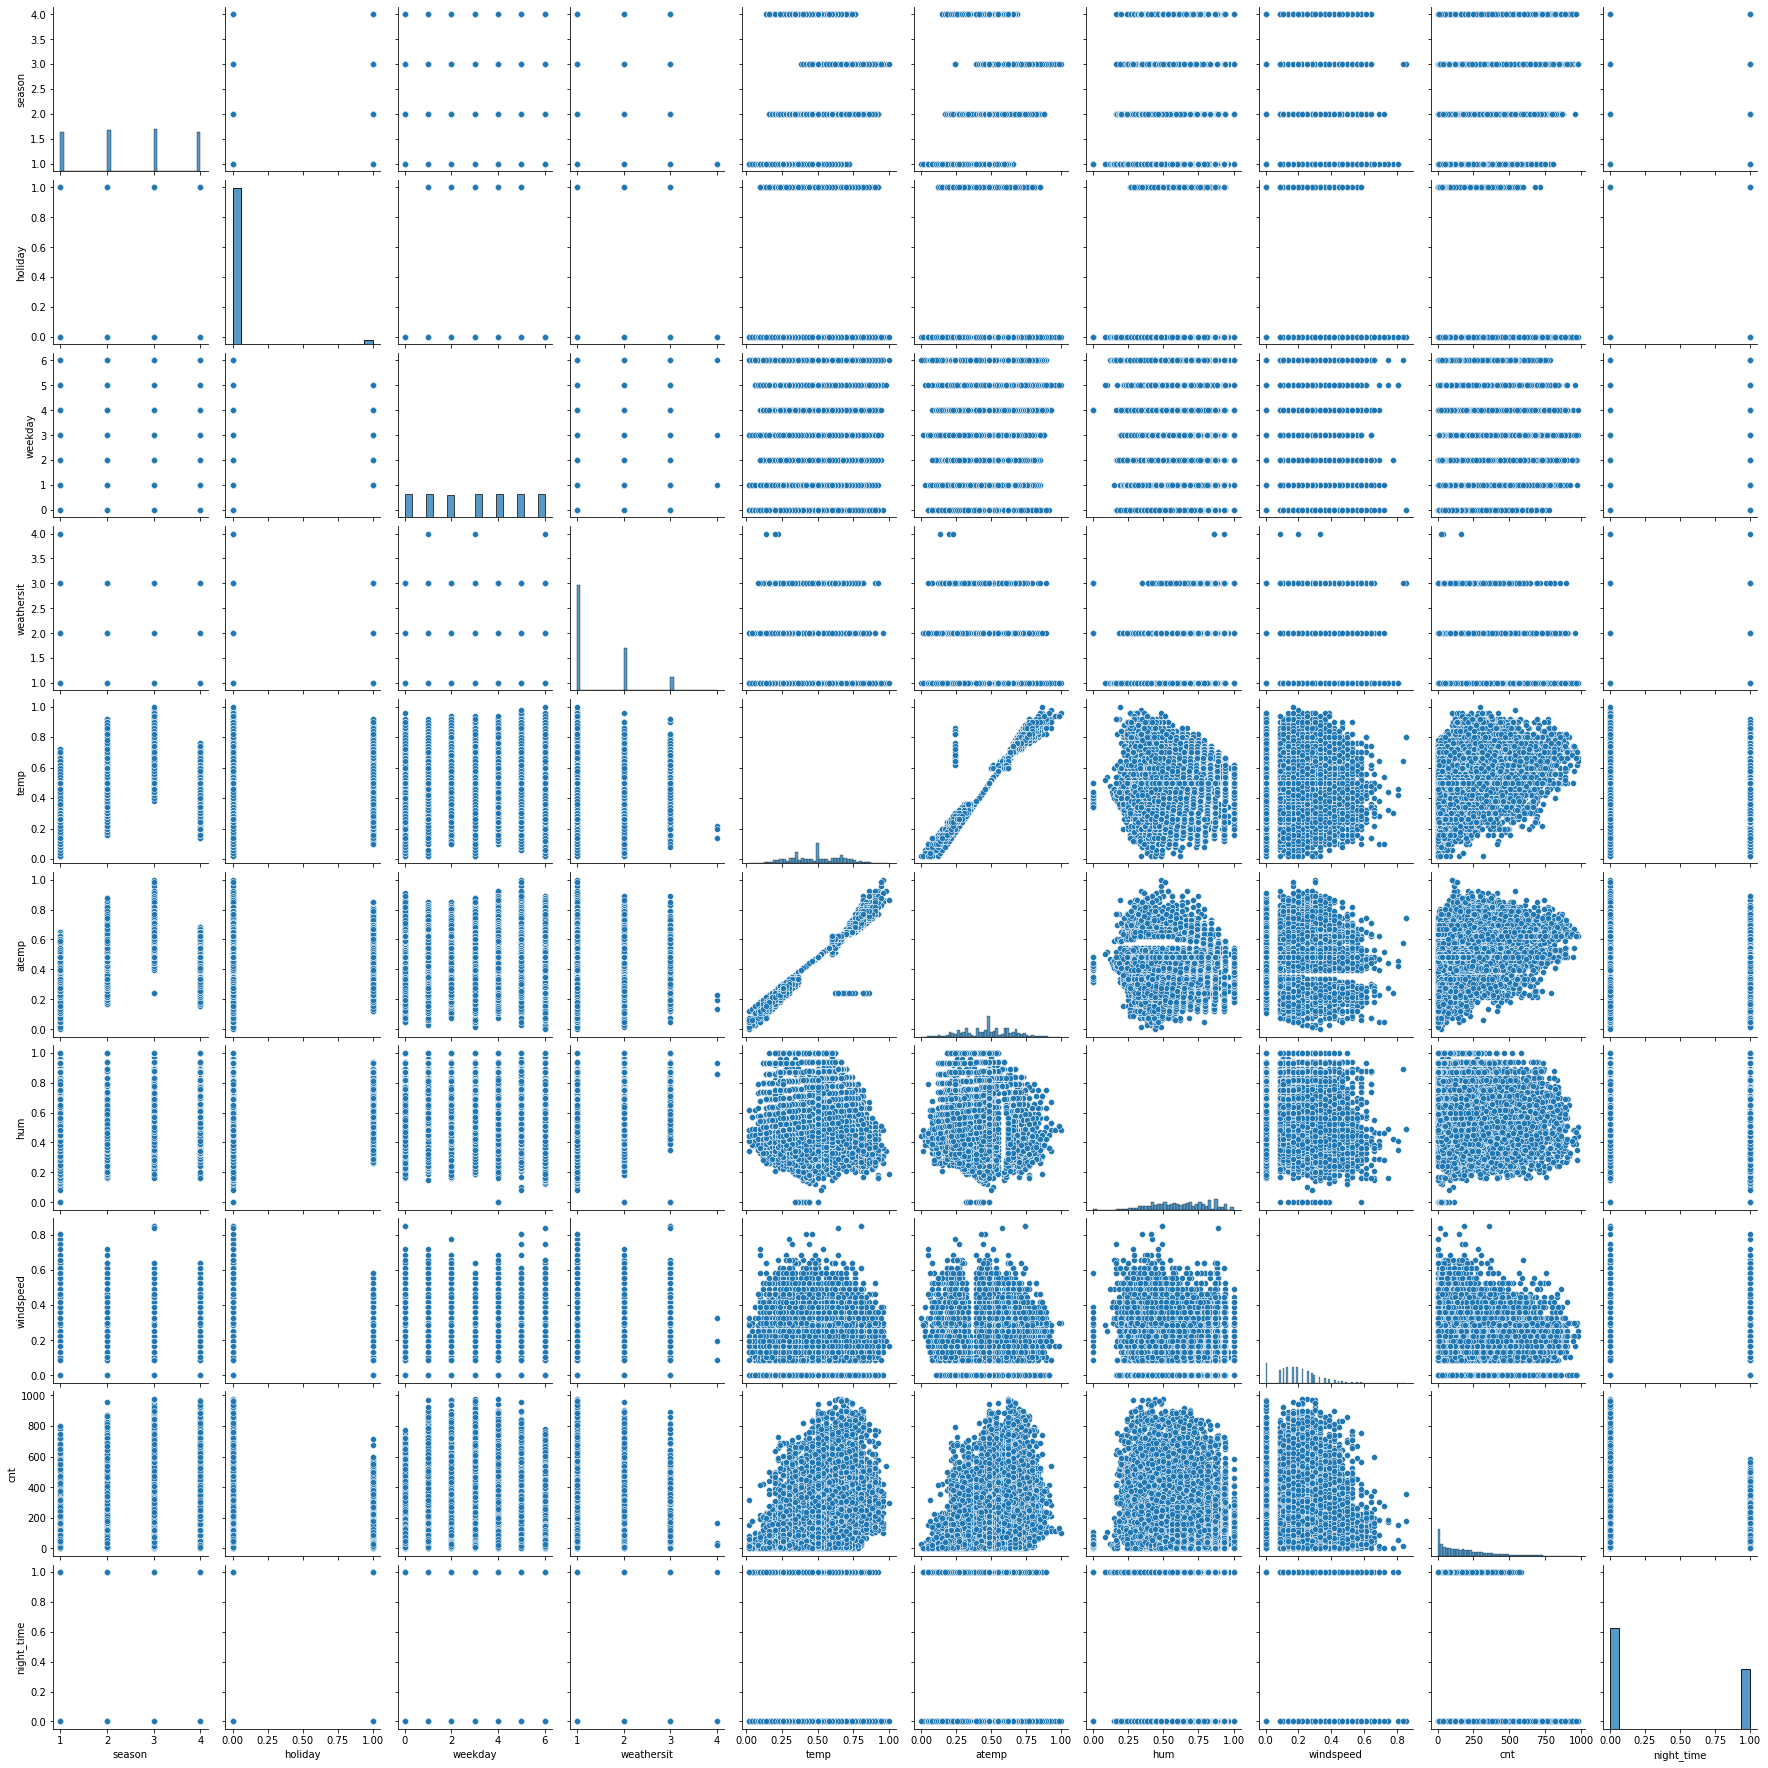

In [ ]:
sns.pairplot(df)

Text(0.5, 1.0, 'Feature Correlation Heatmap')

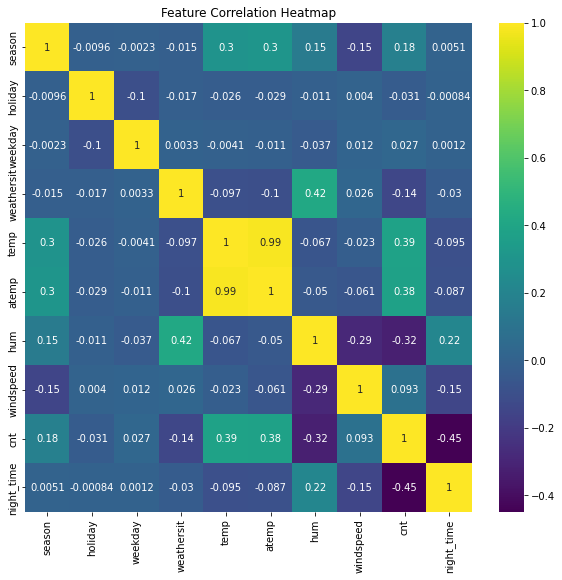

In [ ]:
corr = df.corr() 

plt.figure(figsize=(10,9))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title("Feature Correlation Heatmap")

### 3.3 Encode the data
Encoding the data is the last step in the data preparation stage. 
Here, we are going to transform non-numerical values into numerical ones so that our models can, later on, learn from that data. 

The ordinal data that I have prepared and does not need to be changed further is the variables *night_time*. *Holiday* Column does not need to be encoded too because it is already encoded.

**Label Encoding**: The  variable that needs to be label encoded is working day and peak_period.I would simply turn the various categorical values into numeric values by mapping Yes-->1 and No--->0.

**One Hot Encoding**: The other remaining variables *Season*, *Weather_Sit*, and  others are  not ordinal and have each different categories. Since the order of those categories does not matter and we do not have too many features, we can use One-Hot Encoding. For this, each unique value for each variable gets its own column. 



In [ ]:
# Using the Pandas approach to one hot encoding

features_to_onehot_encode = ["season", "weathersit"]
for f in features_to_onehot_encode:
    df = pd.concat([df, pd.get_dummies(df[f], prefix=f)], axis=1)
    df = df.drop(columns=[f])

In [ ]:
features_to_label_encode = ["workingday","peak_period"]
for f in features_to_label_encode:
    df[f] = sklearn.preprocessing.LabelEncoder().fit_transform(df[f])


# 4) Data Segregation
Now that the data has been prepared, it should be segregated into a train/test or train/val/test split. 
The training set is used to develop and train my model, the test set is used to obtain the performance of the model. 

Since our dataset is yet to be splitted into test and train data already, I am going to split it the data by electing the first 80 percent and save them in a dataframe variable *train_df* and the latter 20% in a variable *test_df*. Then print out the first 10 lines of each subset. I will be doing  a random or automatic selection as it is usually better to calculate the results automatically using percentages rather than manually selecting the top 80%.

In [ ]:
# splitting the dataset into 80% train and 20% test.
train_df = df[:int(0.8*df.shape[0])]
test_df = df[int(0.8*df.shape[0]):]

print(train_df.head(10))
print(test_df.head(10))



In [ ]:
# extracting the features and labels as above and same them  in variables X and y

X = df.drop(columns=['cnt'])
y = df['cnt']
 #shuffle and extract an 80/20 split of the data in the dataframe df using sklearn.model_selection.train_test_split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
# Printing out the top few lines of each dataframe to check that the split was correct
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

In [ ]:
#feature scaling

sc = StandardScaler()
X = sc.fit_transform(X)
X

## Model training 1

In [ ]:
#using linear regression
model = LinearRegression()

In [ ]:
#fitting the linear regression model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
training_score = model.score(X_train,  y_train) 
test_score = model.score(X_test,  y_test)

print(f'Linear Regression -Training set score: {training_score:.2f}')
print(f'Linear Regression -Test set score: {test_score:.2f}')

Linear Regression -Training set score: 0.60
Linear Regression -Test set score: 0.59


In [ ]:
prediction = model.predict(X_test)

In [ ]:
print('The R^2 score : ')

r2_score(y_test,prediction)

The R^2 score : 


0.5875062516813065

The R^2 score indicate that the sore isn't good enough for modelling so I will be retrain the model using Lasso and Ridge

In [ ]:
mean_squared_error(y_test,prediction)

13061.78421422828

In [ ]:
lasso = Lasso()
ridge = Ridge()




In [ ]:
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
y_prediction_o = model.predict(X_test)
y_lasso_o = lasso.predict(X_test)
y_ridge_o = ridge.predict(X_test)

In [ ]:
print("Model(no outliers)\t  RMSE \t\t MSE  \t\t MAE \t\tR2 ") 
print("""LinearRegression \t{:.2f} \t\t{:.2f} \t\t{:.2f} \t\t{:.2f}""".format(mean_squared_error(y_test, prediction,squared=False), mean_squared_error(y_test, prediction),mean_absolute_error(y_test, prediction),r2_score(y_test, prediction)))
print("""LassoRegression \t{:.2f} \t\t{:.2f} \t\t{:.2f} \t\t{:.2f}""".format(mean_squared_error(y_test, y_lasso_o,squared=False), mean_squared_error(y_test, y_lasso_o),mean_absolute_error(y_test, y_lasso_o),r2_score(y_test, y_lasso_o)))
print("""RidgeRegression \t{:.2f} \t\t{:.2f} \t\t{:.2f} \t\t{:.2f}""".format(mean_squared_error(y_test, y_ridge_o,squared=False), mean_squared_error(y_test, y_ridge_o),mean_absolute_error(y_test, y_ridge_o),r2_score(y_test, y_ridge_o)))


Model(no outliers)	  RMSE 		 MSE  		 MAE 		R2 
LinearRegression 	114.29 		13061.78 		85.59 		0.59
LassoRegression 	114.83 		13185.89 		85.78 		0.58
RidgeRegression 	114.27 		13058.38 		85.59 		0.59


In [ ]:
rtraining_score = ridge.score(X_train,  y_train)
rtest_score = ridge.score(X_test,  y_test)

print(f'Ridge Regression -Initial Training set score: {rtraining_score:.2f}')
print(f'Ridge Regression -Initial Test set score: {rtest_score:.2f}')

Ridge Regression -Initial Training set score: 0.60
Ridge Regression -Initial Test set score: 0.59


After retraining, the score remains the same. So I will try to vary the value of alpha to see any effect

In [ ]:
ridge = Ridge(alpha= 0.4).fit(X_train, y_train)

rtraining_score = ridge.score(X_train,  y_train)
rtest_score = ridge.score(X_test,  y_test)

print(f'Ridge Regression -Training set score: {rtraining_score:.2f}')
print(f'Ridge Regression -Test set score: {rtest_score:.2f}')

Ridge Regression -Training set score: 0.60
Ridge Regression -Test set score: 0.59


After changing alpha severally, the score remains the same, so I am going to leave it at that


In [ ]:
model.coef_

array([ -22.48387986,    1.87992361,    4.56556295,  199.87795931,
        113.34805398, -190.48350648,  -27.00012952,  209.94380339,
        -44.62621084,  -32.65060931,    4.81534393,   -9.62027468,
         37.45554006,   30.66314708,   31.26701334,   -5.89736124,
        -56.03279918])

In [ ]:
model.intercept_

80.51879918572621

## Model Training2
using regression tree

In [ ]:
# importing the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 42) 
  
# fit the regressor with X and Y data
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [ ]:
# predicting a new value

regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
predictions

  


array([451.,  13.,  10., ...,  62., 341., 372.])

In [ ]:
X_test

,holiday,weekday,workingday,temp,atemp,hum,windspeed,peak_period,night_time,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4
12830,0,6,0,0.80,0.6970,0.27,0.1940,0,0,0,0,1,0,1,0,0,0
8688,1,1,0,0.50,0.4848,0.41,0.2239,0,1,1,0,0,0,1,0,0,0
7091,0,5,1,0.32,0.3030,0.66,0.2836,0,1,0,0,0,1,1,0,0,0
12230,0,2,1,0.78,0.7121,0.52,0.3582,1,0,0,1,0,0,1,0,0,0
431,0,4,1,0.26,0.2273,0.56,0.3881,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6759,0,5,1,0.56,0.5303,0.94,0.1642,0,0,0,0,0,1,0,1,0,0
13989,0,6,0,0.64,0.5909,0.78,0.1940,0,1,0,0,1,0,0,0,1,0
173,0,6,0,0.20,0.1818,0.59,0.3582,1,0,1,0,0,0,0,1,0,0
16192,1,1,0,0.48,0.4697,0.77,0.1642,1,0,0,0,0,1,1,0,0,0


In [ ]:
y_test

12830    425
8688      88
7091       4
12230    526
431       13
        ... 
6759      17
13989     85
173       98
16192    266
8211     267
Name: cnt, Length: 3476, dtype: int64

FROM X_test, above , we can see that our model predicted the first cnt of bike rented in X_test (row 12830) to be 425 bikes. The second possum 8688) is estimated to be only 88 bikes. 

# Checking the performance of the model with the root mean square error (RMSE)

In [ ]:
tree_rmse = np.sqrt(mean_squared_error(y_test, predictions))
tree_rmse

139.6397060105962

# Conclusion

After using linear regression to train the data, it was noticed that the r^2 score was not good enough to achieve a good model. The RMSE score was also too large. The data was also regularized  using Lasso and Ridgeto see if shrinkage will have effect on the model but it was noticed that it had no effect on it. 

Using decion tree model, the regression tree was also used to model the data.
The RMSE for the linear regression model is 13061.78 (rounded),(which is  very outrageous) while the RMSE for the tree regression model is 139.64 (rounded). The tree regression model performs almost 10 times better than the linear regression model. This shows a profound difference in the two model. Thus it is concluded that the tree model is batter than the linear regression model.


# References

--- 



      - Bike-sharing dataset : http://capitalbikeshare.com/system-data
      -Extracting categorical and numerical data: https://stackoverflow.com/questions/26924904/check-if-dataframe-column-is-categorical
      -Handling missing values: Class notes
      -Binning of the peak_period and night_time: Class note
      -Dropping columns: https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/
      -Data Encoding: Class note
      Data Segregation : Class notes
     -Feature Scaling:  https://www.geeksforgeeks.org/ml-feature-scaling-part-2/
      - Deciding the best Metric: https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e#:~:text=The%20lower%20value%20of%20MAE,variability%20in%20the%20dependent%20variable.
      -Lasso and Ridge for regularization: https://www.geeksforgeeks.org/implementation-of-lasso-ridge-and-elastic-net/
      -Regression Tree: https: //data36.com/regression-tree-python-scikit-learn/
      -Regression Tree: https: //www.geeksforgeeks.org/  and decision-tree-implementation-python/ , 
      https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/
